In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
%matplotlib inline

In [2]:
df = pd.read_csv("spam.csv", encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df = df[["v1", "v2"]]
df = df.rename(columns={"v1":"label", "v2":"text"})
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


<Axes: xlabel='label'>

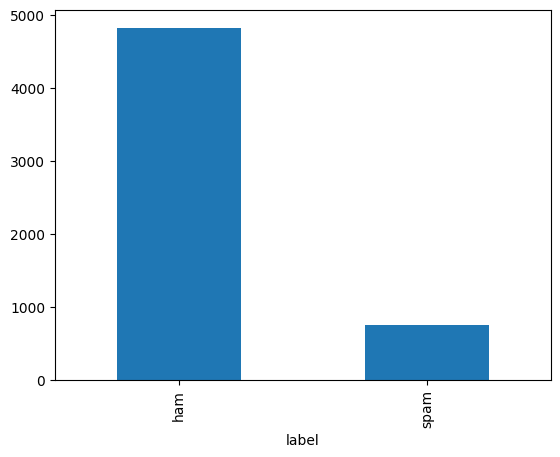

In [4]:
df['label'].value_counts().plot.bar()

In [5]:
df['spam'] = df['label'].map( {'spam': 1, 'ham': 0} ).astype(int)
df['num_chars'] = df['text'].apply(len)
df.duplicated().sum()

403

In [6]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

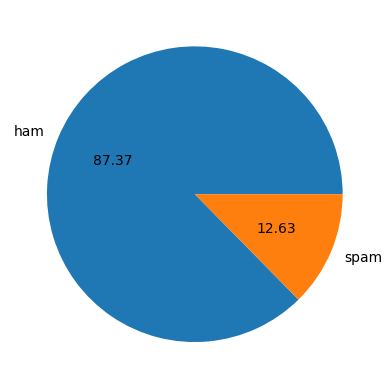

In [7]:
plt.pie(df['label'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [8]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df["num_sents"] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/home/codespace/nltk_data'
    - '/workspaces/ML-Basic/.conda/nltk_data'
    - '/workspaces/ML-Basic/.conda/share/nltk_data'
    - '/workspaces/ML-Basic/.conda/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


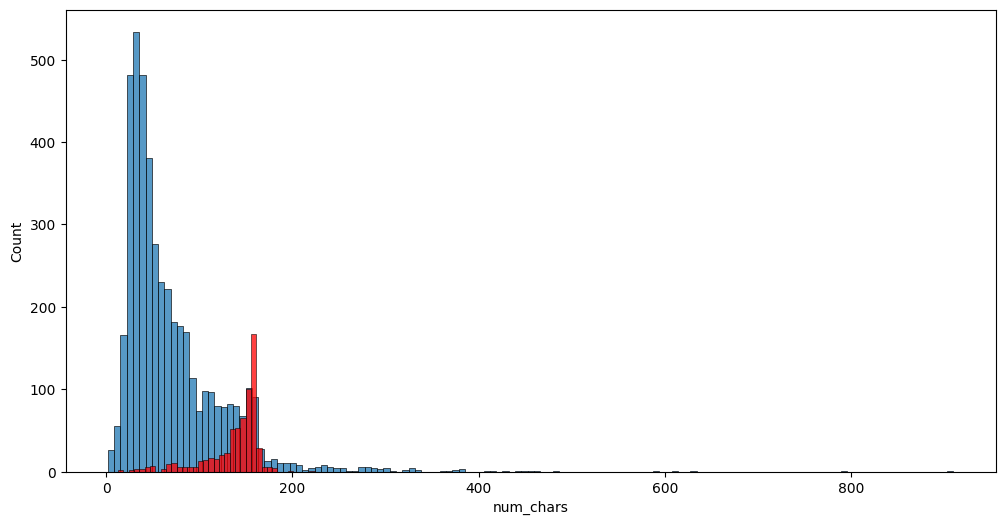

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['spam']==0]['num_chars'])
sns.histplot(df[df['spam']==1]['num_chars'], color='red')
plt.show()

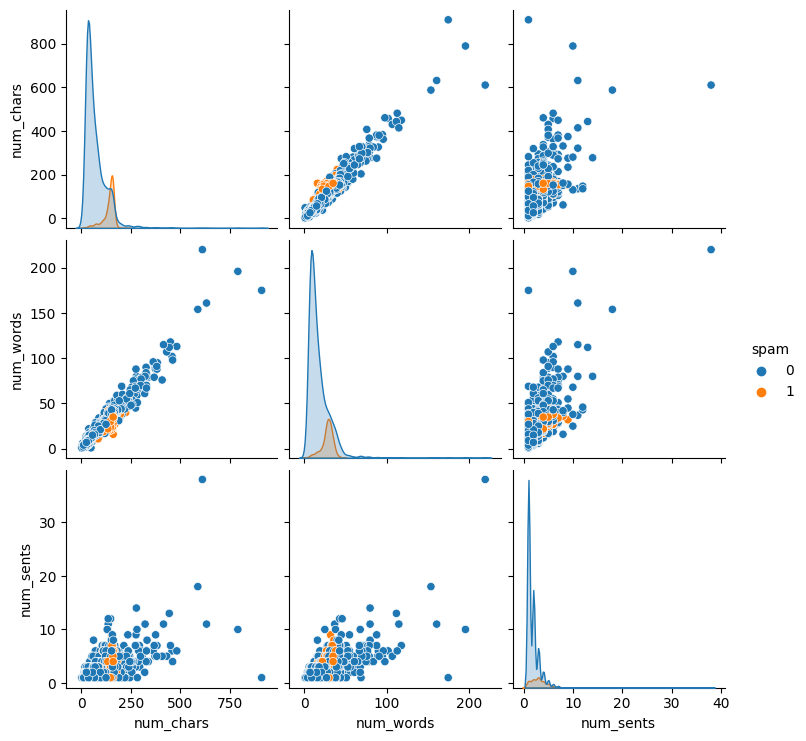

In [ ]:
sns.pairplot(df, hue="spam")
plt.show()

In [ ]:
# nltk.download(['stopwords'])
from nltk.corpus import stopwords

def transform(sms):
    no_punc = [ch for ch in sms if ch not in string.punctuation]
    no_punc = "".join(no_punc).split()

    no_punc_stopwords = \
        [word.lower() for word in no_punc if word.lower() not in stopwords.words('english')]
    return no_punc_stopwords
 
df['transformed_text'] = df['text'].apply(transform)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,text,spam,num_chars,num_words,num_sents,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,0,29,8,2,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,0,49,13,1,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,"[nah, dont, think, goes, usf, lives, around, t..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

bow = CountVectorizer(analyzer=transform).fit(df['text'])
bow_data = bow.transform(df['text'])
data_bow_train, data_bow_test, bow_label_train, bow_label_test = \
  train_test_split(bow_data, df['spam'], test_size=0.2, random_state=0)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer=transform).fit(df['text'])
tfidf_data = tfidf.transform(df['text'])
data_tfidf_train, data_tfidf_test, tfidf_label_train, tfidf_label_test = \
    train_test_split(tfidf_data, df['spam'], test_size=0.2, random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
data_bow_train = data_bow_train.A
data_bow_test = data_bow_test.A

data_tfidf_train = data_tfidf_train.A
data_tfidf_test = data_tfidf_test.A

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    # fig, ax = plt.subplots(figsize=(4,4))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  
                cmap="Blues", cbar=False)
    # square = True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')


BOW:
 89.85%
 59.91%


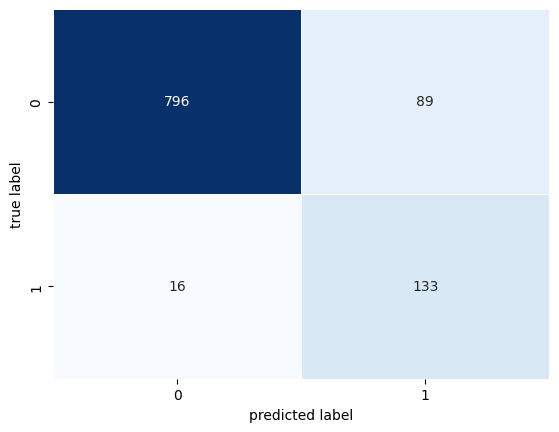

In [ ]:
# Using GaussianNB on BOW
gnb.fit(data_bow_train, bow_label_train)
bow_pred1 = gnb.predict(data_bow_test)
print('\nBOW:')
print(f'{accuracy_score(bow_label_test, bow_pred1)*100 : .2f}%')
print(f'{precision_score(bow_label_test, bow_pred1)*100 : .2f}%')
plot_confusion_matrix(bow_label_test, bow_pred1)


TFIDF:
 89.36%
 58.90%


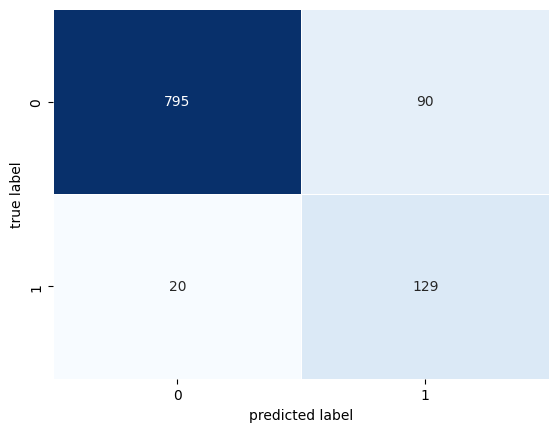

In [ ]:
# Using GaussianNB on TFIDF
gnb.fit(data_tfidf_train, tfidf_label_train)
tfidf_pred1 = gnb.predict(data_tfidf_test)
print('\nTFIDF:')
print(f'{accuracy_score(tfidf_label_test, tfidf_pred1)*100 : .2f}%')
print(f'{precision_score(tfidf_label_test, tfidf_pred1)*100 : .2f}%')
plot_confusion_matrix(tfidf_label_test, tfidf_pred1)


BOW:
 96.42%
 85.90%


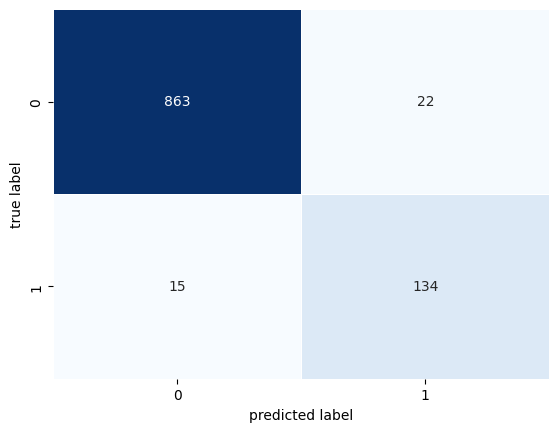

In [ ]:
# Using MultinomialNB on BOW
mnb.fit(data_bow_train, bow_label_train)
bow_pred2 = mnb.predict(data_bow_test)
print('\nBOW:')
print(f'{accuracy_score(bow_label_test, bow_pred2)*100 : .2f}%')
print(f'{precision_score(bow_label_test, bow_pred2)*100 : .2f}%')
plot_confusion_matrix(bow_label_test, bow_pred2)


TFIDF:
 89.36%
 58.90%


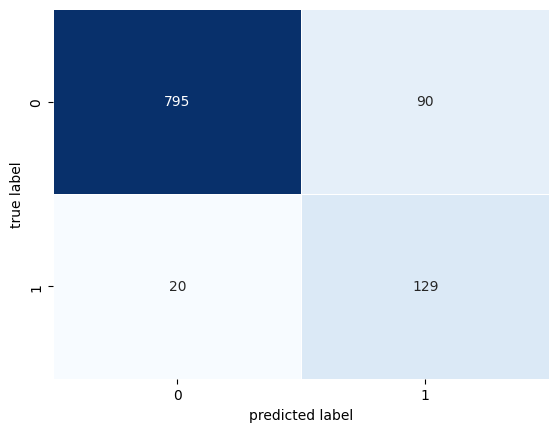

In [ ]:
# Using MultinomialNB on TFIDF
mnb.fit(data_tfidf_train, tfidf_label_train)
tfidf_pred2 = gnb.predict(data_tfidf_test)
print('\nTFIDF:')
print(f'{accuracy_score(tfidf_label_test, tfidf_pred2)*100 : .2f}%')
print(f'{precision_score(tfidf_label_test, tfidf_pred2)*100 : .2f}%')
plot_confusion_matrix(tfidf_label_test, tfidf_pred2)


BOW:
 96.81%
 95.31%


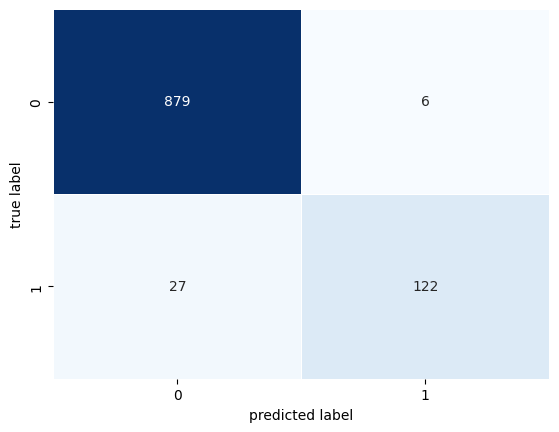

In [ ]:
# Using BernoulliNB on BOW
bnb.fit(data_bow_train, bow_label_train)
bow_pred3 = mnb.predict(data_bow_test)
print('\nBOW:')
print(f'{accuracy_score(bow_label_test, bow_pred3)*100 : .2f}%')
print(f'{precision_score(bow_label_test, bow_pred3)*100 : .2f}%')
plot_confusion_matrix(bow_label_test, bow_pred3)


TFIDF:
 89.36%
 58.90%


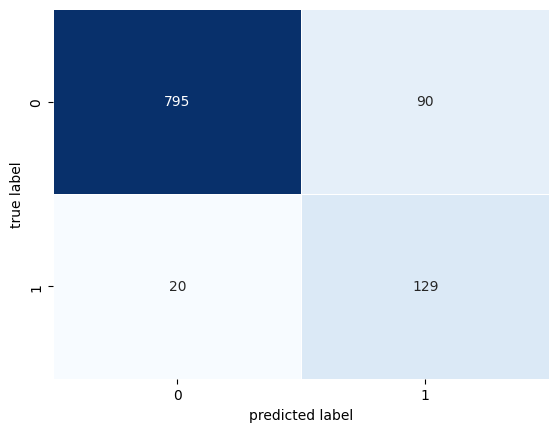

In [ ]:
# Using BernoulliNB on TFIDF
bnb.fit(data_tfidf_train, tfidf_label_train)
tfidf_pred3 = gnb.predict(data_tfidf_test)
print('\nTFIDF:')
print(f'{accuracy_score(tfidf_label_test, tfidf_pred3)*100 : .2f}%')
print(f'{precision_score(tfidf_label_test, tfidf_pred3)*100 : .2f}%')
plot_confusion_matrix(tfidf_label_test, tfidf_pred3)